# Netflix Dataset — Major Project Analysis


In [15]:
# 1. Environment Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline in Jupyter
%matplotlib inline

# Set a clean style for plots
sns.set(style="whitegrid", palette="pastel")

In [16]:
# 2. Load Dataset
df = pd.read_csv("Netflix Dataset.csv")

# Preview first rows
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# 3. Data Preprocessing
# Check info about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [4]:
# Check for missing values
df.isnull().sum()


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [7]:
# Fill NA values with placeholders
df['Director'].fillna("Unknown", inplace=True)
df['Cast'].fillna("Not Available", inplace=True)
df['Country'].fillna("Unknown", inplace=True)

In [8]:
# Convert 'date_added' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [9]:
# Extract year from 'date_added'
df['year_added'] = df['Release_Date'].dt.year

In [10]:
# Clean up 'duration' column
df['Duration'] = df['Duration'].fillna("0 min")
df['duration_int'] = df['Duration'].str.extract('(\d+)').astype(float)

# Check cleaned dataset
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year_added,duration_int
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0


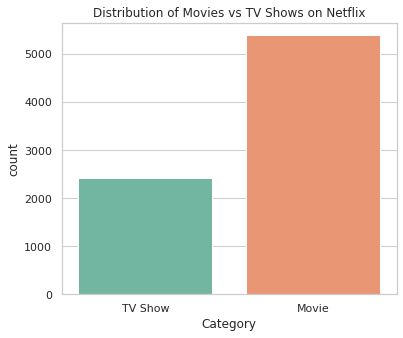

In [11]:
# 4. Exploratory Data Analysis (EDA) & Visualization

# 4.1 Movies vs TV Shows distribution
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Category", hue="Category", palette="Set2", legend=False)
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()

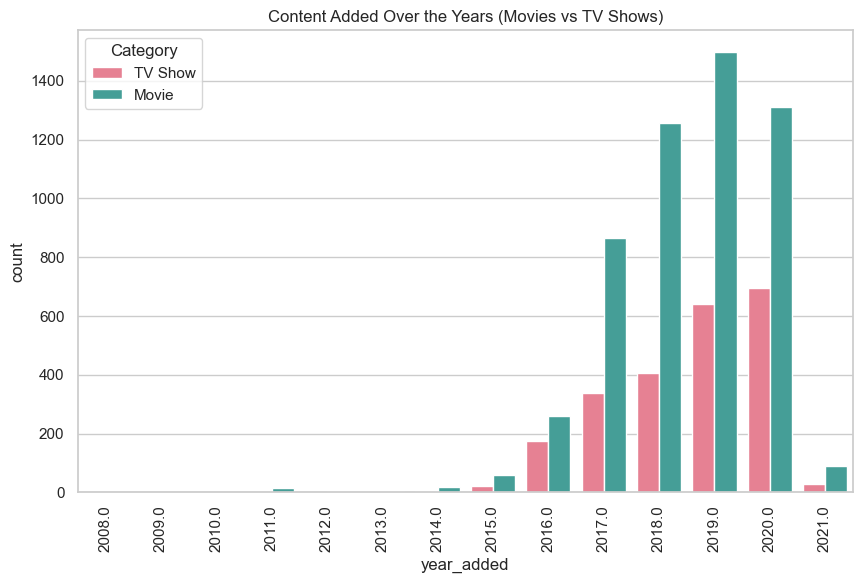

In [26]:
# 4.2 Trend over the years
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="year_added", hue="Category", palette="husl")
plt.xticks(rotation=90)
plt.title("Content Added Over the Years (Movies vs TV Shows)")
plt.show()

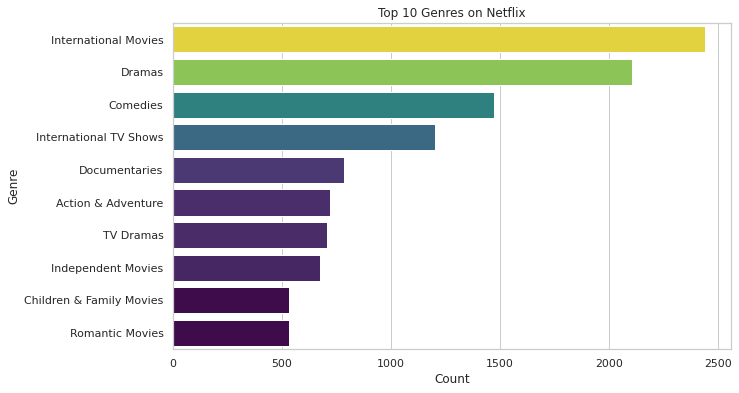

In [12]:
# 4.3 Top 10 Genres
# 'Type' contains genres, split and count
from collections import Counter

genre_list = []
for i in df['Type'].dropna():   # <-- 'Type' is the genre column
    genre_list.extend([x.strip() for x in i.split(',')])

genre_count = Counter(genre_list).most_common(10)

genres_df = pd.DataFrame(genre_count, columns=['Genre','Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=genres_df, x="Count", y="Genre", hue="Count",palette="viridis",legend=False)
plt.title("Top 10 Genres on Netflix")
plt.show()


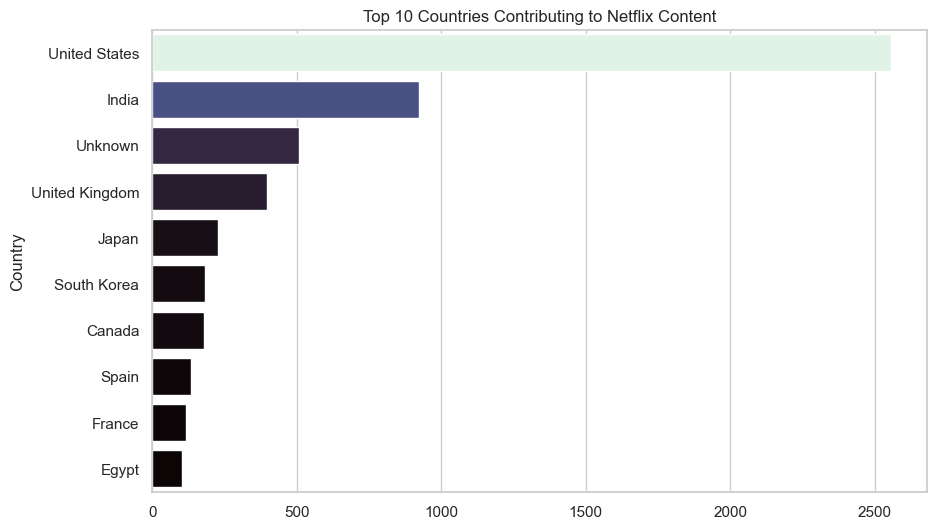

In [37]:
# 4.4 Country-wise contribution (Top 10)
country_count = df['Country'].value_counts().head(10)   # <-- 'Country'

plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette="mako",legend=False,hue=country_count.values)
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.show()


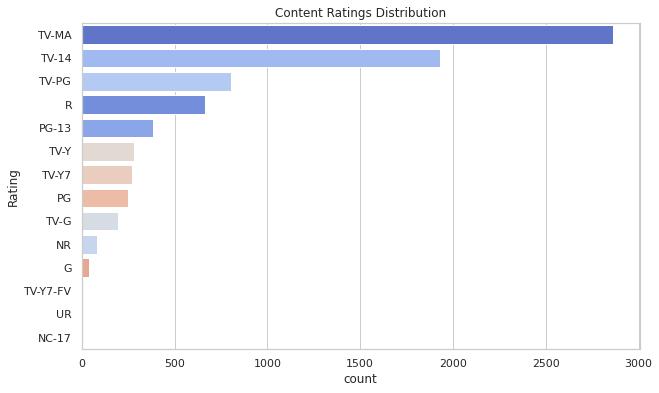

In [13]:
# 4.5 Rating distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Rating", order=df['Rating'].value_counts().index, palette="coolwarm",legend=False,hue="Rating")
plt.title("Content Ratings Distribution")
plt.show()

In [14]:
# 5. Insights Filtering Examples

# Example: Movies released after 2015
recent_movies = df[(df['Category']=="Movie") & (df['year_added']>=2015)]
print("Number of Movies after 2015:", recent_movies.shape[0])

# Example: TV Shows longer than 3 seasons
tv_long = df[(df['Category']=="TV Show") & (df['duration_int']>3)]
print("Number of TV Shows with more than 3 seasons:", tv_long.shape[0])

# Example: Most frequent directors
top_directors = df['Director'].value_counts().head(10)
print("Top Directors on Netflix:\n", top_directors)

Number of Movies after 2015: 5332
Number of TV Shows with more than 3 seasons: 236
Top Directors on Netflix:
 Director
Unknown                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


# Conclusion
* Content Distribution – The platform hosts both Movies and TV Shows, with Movies being the dominant category.
* Yearly Trends – By analyzing the year_added column, we noticed clear growth in the number of titles added over time, with fluctuations in the contribution of Movies and TV Shows each year.